# More matplotlib

Matplotlib is another huge package that you can spend years working with and still not figure out everything it can do or how to do it. Matplotlib is probably the easiest major Python package to get totally confused by, which is why I usually go straight to StackOverflow to figure out how to do 'X with matplotlib' when 'X' is something new I've seen in someone else's papers, something I've guessed should be possible, but I've no clue how to do it, or one of those things I learned a few months ago and subsequently forgot.

Experience with matplotlib mainly teaches you about its jargon, which at least helps speed up those searches.

This notebook introduces a few common things that are useful for making plots for astronomy papers.

- Histograms
- Legends
- Grids of plots
- Filling between lines

## Histograms

In th first matplotlib notebook we made a scatter plot of some points with a Gaussian distribution of points in (x,y). Here's the data again:

In [32]:
np.random.seed(42)
x = np.random.normal(loc=50,scale=20,size=1000)
y = np.random.normal(loc=x+5,scale=10,size=1000)

Here's the scatter plot again:

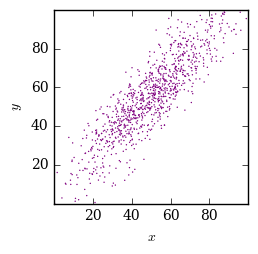

In [33]:
f_b = pl.figure(figsize=(2.5,2.5))
ax = pl.gca()
ax.scatter(x,y,s=1,edgecolor='None',c='purple',label='$z=0$')
ax.set_xlim(0,100)
ax.set_ylim(0,100)
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$');

The following example shows a simple way to plot a histogram of the `x` coordinates of these points.

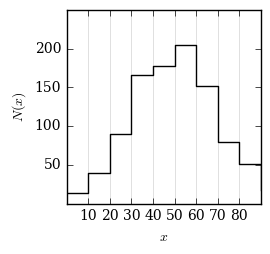

In [34]:
f = pl.figure(figsize=(2.5,2.5))

bin_edges_x = np.arange(0,110,10)
hx, junk_bins = np.histogram(x,bins=bin_edges_x) # junk_bins is just equal to bin_edges_x here
pl.plot(bin_edges_x[:-1],hx,drawstyle='steps-post',c='k')
ax = pl.gca()
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$N(x)$');

# Just for this example, plot the edges of the bins as well
for bin_edge in bin_edges_x[:-1]:
    pl.axvline(bin_edge,c='lightgrey',lw=0.5,zorder=-10);

Notice that the array of bin *edges* we use for the histogram is one element larger than the histogram itself, because the bin edges include the right-most edge. We have to chop this off with `[:-1]` when we pass the array of edges to `plot`. The option `steps-post` to `plot` tells it that each value in the array of `x` coordinates (i.e. `bin_edges_x`) is the *left-hand* side of a bin that extends to the next value.

I prefer that way of doing it because it's simple, but there are alternatives. For example, you could use the `hist` function of `matplotlib`, which is just as easy to use but draws more 'stuff' on the plot (a bunch of rectangles, rather than a line).

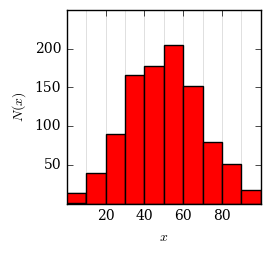

In [35]:
f = pl.figure(figsize=(2.5,2.5))
h,junk_bins,patches = pl.hist(x,bins=np.arange(0,110,10),color='red')

ax = pl.gca()
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$N(x)$');

# Just for this example, plot the edges of the bins as well
for bin_edge in bin_edges_x[:-1]:
    pl.axvline(bin_edge,c='lightgrey',lw=0.5,zorder=-10);

(Notice that `hist` returns the `patches` (rectangles) used to make the plot, as well as the histogram and the bins that you get from `np.histogram`.) 

You can make the matplotlib version draw a line instead using the option `histtype='step'`, as in the next example.

It's common to normalize histograms such that the total area underneath them is equal to 1. You can do this with the `normed=True` keyword argument (either in `numpy` or `matplotlib`).

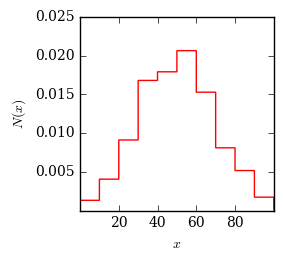

In [36]:
f = pl.figure(figsize=(2.5,2.5))

h_matplot,junk_bins,patches = pl.hist(x,bins=np.arange(0,110,10),color='red',normed=True,histtype='step')

ax = pl.gca()
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$N(x)$');

We can plot the generating distribution (the Gaussian we sampled `x` from in the first place) over the top of the histogram. 

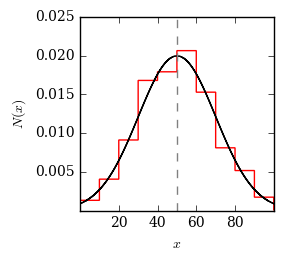

In [37]:
f = pl.figure(figsize=(2.5,2.5))

h_matplot,junk_bins,patches = pl.hist(x,bins=np.arange(0,110,10),color='red',normed=True,histtype='step')

# Import a useful routine to work with the normal distribution from the scipy package.
from scipy.stats import norm
xx = np.arange(0,100.1,0.1) # we need a lot of x values to make a smooth distribution
# norm.pdf(x,mean,sigma) gives the value of the normal distribution at x
pl.plot(xx,norm.pdf(xx,50,20.0),c='k',drawstyle='steps-post',ls='solid')
pl.axvline(50,c='grey',ls='--') # helpful line at the mean of the distribution

ax = pl.gca()
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$N(x)$');

Last thing for this example: what if we wanted to plot the underlying Gaussian distribution at the same resolution as our binned `x` data?

(0, 100)

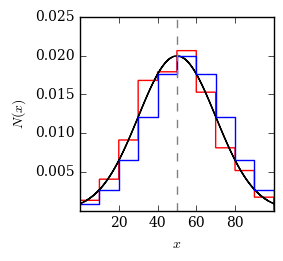

In [38]:
f = pl.figure(figsize=(2.5,2.5))

h_matplot,junk_bins,patches = pl.hist(x,bins=np.arange(0,110,10),color='red',normed=True,histtype='step')

from scipy.stats import norm
# Smooth version as above
xx = np.arange(0,100.1,0.1)
pl.plot(xx,norm.pdf(xx,50,20.0),c='k',drawstyle='steps-post',ls='solid')
# Blocky version
pl.plot(bin_edges_x,norm.pdf(bin_edges_x,50,20.0),c='b',drawstyle='steps-post')

pl.axvline(50,c='grey',ls='--') # helpful line at the mean of the distribution

ax = pl.gca()
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$N(x)$');
pl.xlim(0,100)

The blue histogram doesn't line up... see if you can fix it. 

This is quite an easy mistake to make, but the solution isn't as easy as it looks. Clue: you need to add one line to make different values of x to give to `norm.pdf`, and use these in the blocky-version `plot` line together with a change to one of the optional arguments. 

The above example used two keyword arguments available in most `matplotlib` routines: 
- `alpha`: changes the transparency of lines or markers (`alpha=0` transparent, `alpha=1` solid)
- `zorder`: changes the relative ordering of lines or markers (objects with high `zorder` are drawn on top of those with lower `zorder`).

## Legends

This example shows how to make a legend automatically by adding 'label=' arguments in routines that add points and lines to plots.

In [ ]:
pl.figure(figsize=(3,3))
pl.scatter(line_data['x'],line_data['y'],marker='s',edgecolor='None',c='k',label='Positive')
pl.scatter(-line_data['x'],-line_data['y'],marker='s',edgecolor='None',c='r',label='Negative')
pl.legend(loc='lower right') # Loc is the location of the legend.

We can change the look of the legend using its many options. Here I get rid of the box around it, change the symbols to be big squares rather than the default of three little squares, and put the labels on the left-hand side.

In [ ]:
pl.figure(figsize=(3,3))
pl.scatter(line_data['x'],line_data['y'],marker='s',edgecolor='None',c='k',label='Positive')
pl.scatter(-line_data['x'],-line_data['y'],marker='s',edgecolor='None',c='r',label='Negatiave')
pl.legend(loc='lower right',frameon=False,scatterpoints=1,markerscale=2,
          markerfirst=False,handletextpad=0.2,fontsize=10);

# Let's fix the x tick labels while we're at it...
ax = pl.gca()
pl.setp(ax.get_xticklabels(),rotation=45);

Sometimes we want to have even more control over the legend. You can build your own legend by passing explicit `handles` and `labels` as the first two arguments to `legend`. The `labels` are just the text for each entry. The `handles` are 'primitive' matplotlib objects -- for example, a line is `Line2D`. This allows us to control the order of the legend without changing the order of the plot, and (for example) to have a line in the legend even though the points on the plot were made with `scatter`.

In [ ]:
pl.figure(figsize=(3,3))
pl.scatter(line_data['x'],line_data['y'],marker='s',edgecolor='None',c='k')
pl.scatter(-line_data['x'],-line_data['y'],marker='s',edgecolor='None',c='r')

ax = pl.gca()
pl.setp(ax.get_xticklabels(),rotation=45);

# Make a list of handles and a list of labels (in the same order).
handles = list()
labels  = list()

handles.append(pl.Line2D([0],[1],c='r',lw=4))
labels.append('Negative')

handles.append(pl.Line2D([0],[1],c='k',lw=4))
labels.append('Positive')

pl.legend(handles,labels,loc='lower right',frameon=False,scatterpoints=1,markerscale=2,
          markerfirst=False,handletextpad=0.2,fontsize=10);

This even allows us to put two legends on the same plot, **but** we need to use a trick, otherwise `matplotlib` removes the first legend when we plot the second one.

In [ ]:
pl.figure(figsize=(3,3))
pl.scatter(line_data['x'],line_data['y'],marker='s',edgecolor='None',c='k')
pl.scatter(-line_data['x'],-line_data['y'],marker='s',edgecolor='None',c='r')

ax = pl.gca()
pl.setp(ax.get_xticklabels(),rotation=45);

# Make a list of handles and a list of labels (in the same order).
handles = list()
labels  = list()

handles.append(pl.Line2D([0],[1],c='r',lw=4))
labels.append('Negative')
handles.append(pl.Line2D([0],[1],c='k',lw=4))
labels.append('Positive')

# Notice we store whatever gets returned from legend in a variable here
legend1 = pl.legend(handles,labels,loc='lower right',frameon=False,scatterpoints=1,markerscale=2,
          markerfirst=False,handletextpad=0.2,fontsize=10);

# For the sake of this example, just plot the same legend again in a different place. 
# This removes legend1 from the plot!
legend2 = pl.legend(handles,labels,loc='upper left',frameon=False,scatterpoints=1,markerscale=2,
          markerfirst=False,handletextpad=0.2,fontsize=10);

# Trick to get the first legend back:
ax = pl.gca() # get the axes object
ax.add_artist(legend1) # put the first legend back

## Grids of plots

This example shows how to make a grid of plots using the `gridspec` module. There is a more 'low level' way to do this that use `pl.subplot` directly without importing `gridspec`, but I don't recommend that, because I find gridspec is much easier to use. Be warned, over time `matplotlib` has introduced (too many) different ways to do this, so there is a lot of old, confusing advice on the web. 

In [ ]:
import matplotlib.gridspec as gridspec

figure = pl.figure(figsize=(4,4*3.0/2.0))

nrow, ncol = 3,2
gs         = gridspec.GridSpec(nrow,ncol,wspace=0.0,hspace=0.0)

# This GridSpec object can be indexed with [] like a list or array.
# The wspace=0 and hspace=0 remove all the space between the panels.
# Set them to something larger (e.g. 1.0) if you want space between
# the panels.

# For later reference, I like to store each panel of the plot in a list
axes = list()

# Loop over rows and columns
for irow in range(0,nrow):
    for icol in range(0,ncol):
        # Pass the GridSpec object for this row and column to pl.subplot
        # This creates and returns a new axes object representing this panel.
        ax = pl.subplot(gs[irow,icol])
    
        # Plot something on this axis. In this case, we'll just write the
        # row and column as a text label (explained below)
        pl.text(0.3,0.5,'Axis (%d,%d)'%(irow,icol),transform=ax.transAxes)
        axes.append(ax) # store this axes object in our list

# Now format all the axes -- for example, get rid of the labels on the
# x-axis, except for the bottom row. 

# I like to put this formatting at the end, but it could be
# included along with the loop that makes the plots above. 

# There are lots of ways to do this. This way should work 
# regardless of the values of nrow and ncol.
axes       = np.array(axes).reshape(nrow,ncol) # reshape the list we made to match the shape of the plot
# This will be True for the bottom row, where we 
has_xtick  = np.repeat(True,nrow*ncol).reshape(nrow,ncol)
has_xtick[:-1,:] = False
has_ytick  = np.repeat(True,nrow*ncol).reshape(nrow,ncol)
has_ytick[:,1:] = False

for iax in range(0,6):
    # This is an alternative to a nested loop over irow, icol
    gridcoord = np.unravel_index(iax,(nrow,ncol))
    # Hide x tick labels, except for the bottom row
    pl.setp(axes[gridcoord].get_xticklabels(),visible=has_xtick[gridcoord])
    # Hide y tick labels, except for the left hand column 
    pl.setp(axes[gridcoord].get_yticklabels(),visible=has_ytick[gridcoord])
    # Trim the tick labels from the end of each axis
    pl.setp(axes[gridcoord].get_xticklabels()[0],visible=False)
    pl.setp(axes[gridcoord].get_xticklabels()[-1],visible=False)
    pl.setp(axes[gridcoord].get_yticklabels()[0],visible=False)
    pl.setp(axes[gridcoord].get_yticklabels()[-1],visible=False)

In the above example, we wrote text labels using `pl.text(x,y,label)`. We included the optional argument `transform=ax.transAxes`. This 'magic' lets us write `x` and `y` for the text as fractions of the extent of each axis (i.e. numbers between 0 and 1). If we didn't, we would have to give `x` and `y` in the units of the axis, which is usually not what we want to do, unless we're putting labels near specific data points.

## Fill Between

This example should be obvious when you've made the plot. If you use this in more complicated situations and it comes out looking ugly, have a look at the `where` argument to `fill_between`.

In [ ]:
x  = np.arange(-2*np.pi,2*np.pi,0.01)
y1 = np.sin(x)
y2 = np.sin(x+np.pi/2.0)

pl.figure(figsize=(8,2))
pl.plot(x,y1,c='k')
pl.plot(x,y2,c='r')
pl.fill_between(x,y1,y2,color='c',alpha=0.2)

# Notice what's going on with the '2*list' here
pl.fill_betweenx([-1,1],2*[2*np.pi/2.0],2*[2.5*np.pi/2.0],color='m',alpha=0.2)

pl.xlim(-2*np.pi,2*np.pi)
pl.ylim(-1,1);

## End of notebook